In [1]:
import pandas as pd
import seaborn as sns
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
%matplotlib inline

# Data Download

In [2]:
def download_file(url):
    filename = url.split('/')[-1]
    if not os.path.exists(filename):
        response = requests.get(url)
        open(filename, 'wb').write(response.content)
        print(f'{filename} downloaded')
    else:
        print(f'{filename} already exists')

In [3]:
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/dev.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/test.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/train.tsv')
download_file('https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/emotions.txt')

dev.tsv already exists
test.tsv already exists
train.tsv already exists
emotions.txt already exists


In [4]:
df_train = pd.read_csv("train.tsv", sep="\t", names=["text","label", "id"])
df_val = pd.read_csv("dev.tsv", sep="\t", names=["text","label", "id"])
df_test = pd.read_csv("test.tsv", sep="\t", names=["text","label", "id"])
print(f"[Train] the dataframe shape: {df_train.shape}")
print(f"[Val] the dataframe shape: {df_val.shape}")
print(f"[Test] the dataframe shape: {df_test.shape}")

[Train] the dataframe shape: (43410, 3)
[Val] the dataframe shape: (5426, 3)
[Test] the dataframe shape: (5427, 3)


In [5]:
# Concat all datasets
df = pd.concat([df_train, df_val, df_test])


# Data Preprocessing

In [6]:
df

,text,label,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9


In [7]:
df['List of classes'] = df['label'].apply(lambda x: x.split(','))
df['Len of classes'] = df['List of classes'].apply(lambda x: len(x))
print(f"max len of classes: {df['Len of classes'].max()}")

max len of classes: 5


In [8]:
df[df['Len of classes'] == 5]

,text,label,id,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


[45446, 8124, 655, 37, 1]


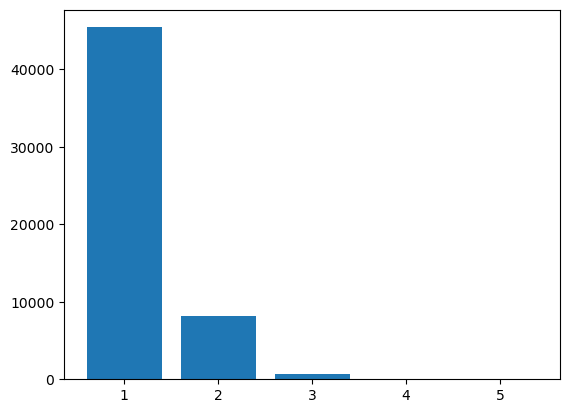

In [9]:
temp_df = df["Len of classes"].value_counts()
print(temp_df.to_list())
plt.bar(x=range(1,6), height=temp_df.to_list());

In [10]:
# from emotion.txt we get the labels for each for those emotions
label_to_emotion = {}
with open("emotions.txt") as f:
    for i,line in enumerate(f):
        label_to_emotion[str(i)] = line.strip("\n")
label_to_emotion

{'0': 'admiration',
 '1': 'amusement',
 '2': 'anger',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral'}

In [11]:
for i in label_to_emotion:
    df[label_to_emotion[i]] = df['List of classes'].apply(lambda x: 1 if i in x else 0)

In [12]:
df.drop(['label', 'id', 'List of classes', 'Len of classes'], axis=1, inplace =True)
df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5423,Well that makes sense.,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5424,Daddy issues [NAME],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5425,So glad I discovered that subreddit a couple m...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# taking only Joy, Sad, Angry, and Neutral
df = df[(df["joy"]==1) | (df["sadness"]==1) | (df["anger"]==1) | (df["fear"]==1) | (df["neutral"]==1)].loc[:,["text", "anger", "fear", "joy", "sadness", "neutral"]]
df.reset_index(drop=True, inplace=True)
df

,text,anger,fear,joy,sadness,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,0
3,To make her feel threatened,0,1,0,0,0
4,It might be linked to the trust factor of your...,0,0,0,0,1
...,...,...,...,...,...,...
23604,The essay is optional.,0,0,0,0,1
23605,Waiting for both of these things is torture,0,0,0,0,1
23606,Easy just include [NAME] to continue to tormen...,0,0,0,0,1
23607,Daddy issues [NAME],0,0,0,0,1


In [14]:
labels = ["anger", "fear", "joy", "sadness", "neutral"]
for index, row in df.iterrows():
    df.loc[index,"emotion"] = labels[np.argmax(row.iloc[1:].tolist())]

df

,text,anger,fear,joy,sadness,neutral,emotion
0,My favourite food is anything I didn't have to...,0,0,0,0,1,neutral
1,"Now if he does off himself, everyone will thin...",0,0,0,0,1,neutral
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,0,anger
3,To make her feel threatened,0,1,0,0,0,fear
4,It might be linked to the trust factor of your...,0,0,0,0,1,neutral
...,...,...,...,...,...,...,...
23604,The essay is optional.,0,0,0,0,1,neutral
23605,Waiting for both of these things is torture,0,0,0,0,1,neutral
23606,Easy just include [NAME] to continue to tormen...,0,0,0,0,1,neutral
23607,Daddy issues [NAME],0,0,0,0,1,neutral


In [15]:
filter_ = (df.drop(['text'], axis=1).sum(axis=1)>1) == True
print(f"sum of values where there is conflict: {filter_.sum()}")
# drop all rows where there is conflict
df.drop(index = df.loc[filter_].index, inplace=True)

sum of values where there is conflict: 297


C:\Users\Youan\AppData\Local\Temp\ipykernel_14656\2280174689.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filter_ = (df.drop(['text'], axis=1).sum(axis=1)>1) == True


# Data Visualization

{'neutral': 17541, 'anger': 1845, 'joy': 1709, 'sadness': 1508, 'fear': 709}


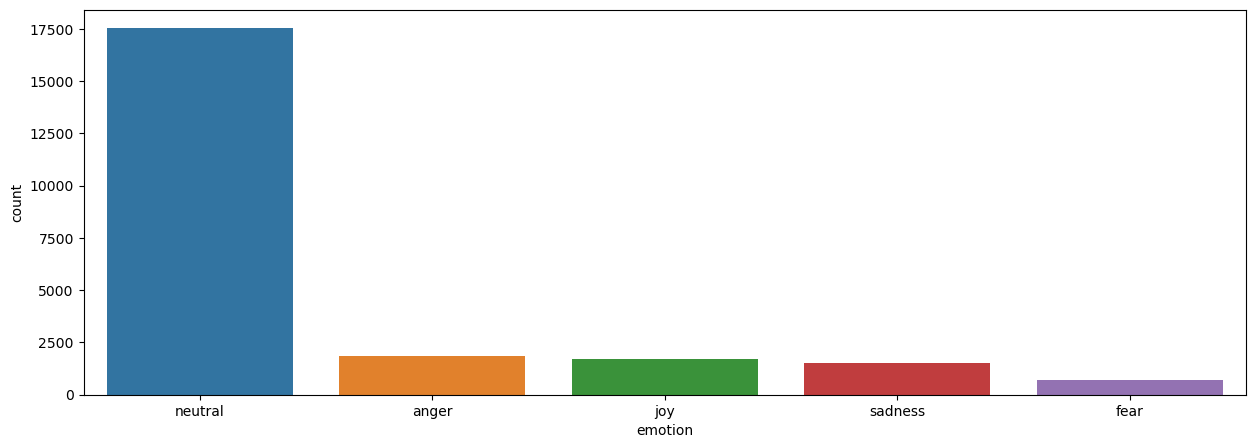

In [16]:
temp_list = df.drop(['text'], axis=1).sum(axis=0).tolist()
counts= dict(zip(["anger", "fear", "joy", "sadness", "neutral"], temp_list))
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print(sorted_counts)

counts_df = pd.DataFrame(sorted_counts.items(), columns=["emotion", "count"])
plt.subplots(figsize=(15,5))
sns.barplot(data = counts_df, x="emotion", y="count", order=counts_df['emotion']);

# Data Split

In [17]:
from sklearn.model_selection import train_test_split
data = df[['text','emotion']]
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify=data['emotion'] )
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train['emotion'] )

# Data Augmentation

In [1]:
from textattack.transformations import WordSwapEmbedding, WordSwapRandomCharacterDeletion, WordSwapQWERTY, CompositeTransformation, WordSwapContract, WordSwapExtend
from textattack.constraints.pre_transformation import RepeatModification, StopwordModification
from textattack.augmentation import Augmenter

In [6]:
# Set up transformations to apply to the text
# WordSwapQWERTY swaps letters with their QWERTY neighbors
# WordSwapRandomCharacterDeletion deletes random characters
# WordSwapContract contracts words (e.g. "I'm" -> "I am")
# WordSwapExtend extends words (e.g. "I am" -> "I'm")
transformations = CompositeTransformation([WordSwapQWERTY(), WordSwapContract(), WordSwapExtend(), WordSwapEmbedding()])

# Set up constraints to avoid modifying the same word multiple times and to prevent the replacement of stopwords
constraints = [RepeatModification(), StopwordModification()]
# Create an augmenter instance with the chosen transformation and constraints
augmenter = Augmenter(transformation=transformations, constraints=constraints, pct_words_to_swap=0.2, transformations_per_example=1)


# additional parameters
augmenter.enable_advanced_metrics = False # Set to True to get more metrics
augmenter.fast_augment = True
# Set to True to get more augmented examples
augmenter.high_yield = False

# Example:
s = "This university is the best institution known to mankind, I don't want to graduate."
s_res = augmenter.augment(s)
print(s_res)

["This college is the exemplary institution known to mankind, I don't want to graduate."]


In [20]:
# Transformation Function
def augment(text):
    try:
        augmented_text = augmenter.augment(text)[0]
    except:
        return text
    
    return augmented_text

# Apply Data Augmentation to Non_neutral texts to resolve data imbalance
aug_data = train.copy()
print("Training set size before Data Aug: {}".format(len(aug_data)))
for i in range(2):
      
    non_neutral = train[train['emotion'] != 'neutral'].copy()
    non_neutral['text'] = non_neutral['text'].apply(augment)
    non_neutral['text'] = non_neutral['text'].apply(augment)
    aug_data = pd.concat([aug_data, non_neutral])
      
aug_data.drop_duplicates(inplace=True)
print("Training set size after Data Aug: {}".format(len(aug_data)))
      
aug_data.reset_index(drop=True, inplace=True)
aug_data

Training set size before Data Aug: 13054
Training set size after Data Aug: 18765


,text,emotion
0,Rape kit test from six year old migrant girl r...,sadness
1,"Idk if I skimmed over it 3 times or what, it d...",neutral
2,"I hope you're ok, I feel this post :( big hugs...",sadness
3,What evidence at all shows that [NAME] was an ...,neutral
4,I'm not crying... you're crying!,anger
...,...,...
18760,Cker... gratitude for pointing that out!,anger
18761,Children taking below decks by [APPOINT]. Get ...,anger
18762,And just get the fuck out and rien watching re...,anger
18763,It's Incrrdible! Both thankful I could pomoc w...,joy


# Output

In [21]:
aug_data.to_csv("processed_train.tsv", sep="\t", index=False)
val.to_csv("processed_val.tsv", sep="\t", index=False)
test.to_csv("processed_test.tsv", sep="\t", index=False)